### Visualising the data

#### What files are in the input folder:

In [1]:
import os 
print('No. of files: {}'.format(str(len(os.listdir("./input")))))
print(os.listdir("./input"))

No. of files: 8
['Data_Dictionary.xlsx', 'historical_transactions.csv', 'merchants.csv', 'new_merchant_transactions.csv', 'readme.md', 'sample_submission.csv', 'test.csv', 'train.csv']


##### Train and Test files

In [39]:
e = pd.read_excel('./input/Data_Dictionary.xlsx', sheetname='train')
e

,train.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,card_id,Unique card identifier
3,first_active_month,"'YYYY-MM', month of first purchase"
4,feature_1,Anonymized card categorical feature
5,feature_2,Anonymized card categorical feature
6,feature_3,Anonymized card categorical feature
7,target,Loyalty numerical score calculated 2 months af...


In [105]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
first_active_month    201917 non-null datetime64[ns]
card_id               201917 non-null object
feature_1             201917 non-null int64
feature_2             201917 non-null int64
feature_3             201917 non-null int64
target                201917 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 9.2+ MB


In [40]:
#Loading Train and Test Data
import pandas as pd

df_train = pd.read_csv("./input/train.csv", parse_dates=["first_active_month"])
df_test = pd.read_csv("./input/test.csv", parse_dates=["first_active_month"])
print("{} observations and {} features in train set.".format(df_train.shape[0],df_train.shape[1]))
print("{} observations and {} features in test set.".format(df_test.shape[0],df_test.shape[1]))

201917 observations and 6 features in train set.
123623 observations and 5 features in test set.


In [3]:
df_train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [4]:
df_test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04-01,C_ID_0ab67a22ab,3,3,1
1,2017-01-01,C_ID_130fd0cbdd,2,3,0
2,2017-08-01,C_ID_b709037bc5,5,1,1
3,2017-12-01,C_ID_d27d835a9f,2,1,0
4,2015-12-01,C_ID_2b5e3df5c2,5,1,1


Let's now look at the target score 

In [5]:
df_train.target.describe()

count    201917.000000
mean         -0.393636
std           3.850500
min         -33.219281
25%          -0.883110
50%          -0.023437
75%           0.765453
max          17.965068
Name: target, dtype: float64

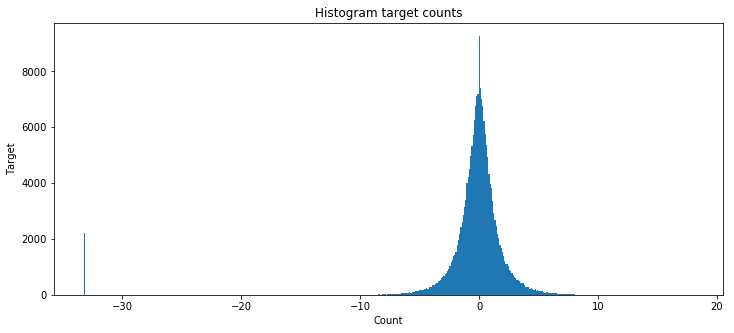

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.hist(df_train.target.values, bins=500)
plt.title('Histogram target counts')
plt.xlabel('Count')
plt.ylabel('Target')
plt.show()

In [52]:
print('There are {0} samples with target lower than -25.'.format(df_train.loc[df_train.target < -25].shape[0]))

There are 2207 samples with target lower than -25.


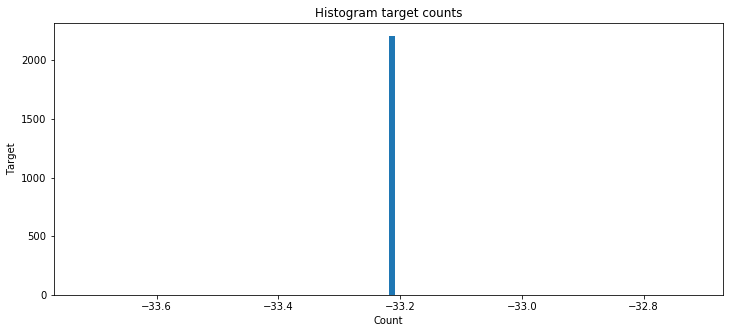

count    2.207000e+03
mean    -3.321928e+01
std      1.193982e-12
min     -3.321928e+01
25%     -3.321928e+01
50%     -3.321928e+01
75%     -3.321928e+01
max     -3.321928e+01
dtype: float64

In [101]:
plt.figure(figsize=(12, 5))
plt.hist(df_train.target.values[:2207], bins=100)
plt.title('Histogram target counts')
plt.xlabel('Count')
plt.ylabel('Target')
plt.show()

df_train_outliers = pd.Series(df_train.target.values[:2207])
df_train_outliers.describe()

One unique target value for 2207 outliers: -33.21928


Let's now look at the distributions of various "features"

Feature 1

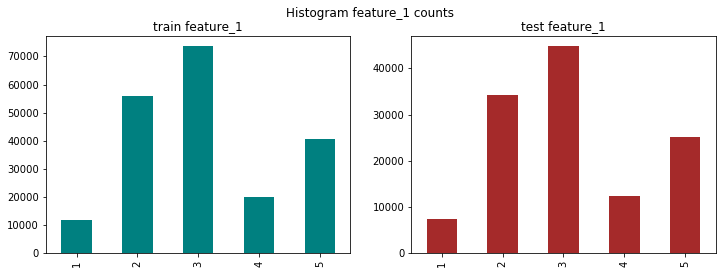

In [87]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4));
df_train['feature_1'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='train feature_1');
df_test['feature_1'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='test feature_1');
plt.suptitle('Histogram feature_1 counts');
plt.show()

Feature 2

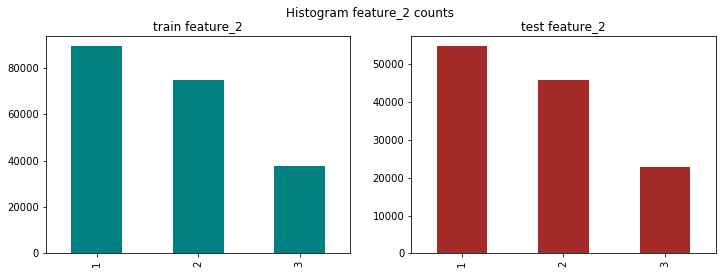

In [89]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4));
df_train['feature_2'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='train feature_2');
df_test['feature_2'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='test feature_2');
plt.suptitle('Histogram feature_2 counts');
plt.show()

Feature 3

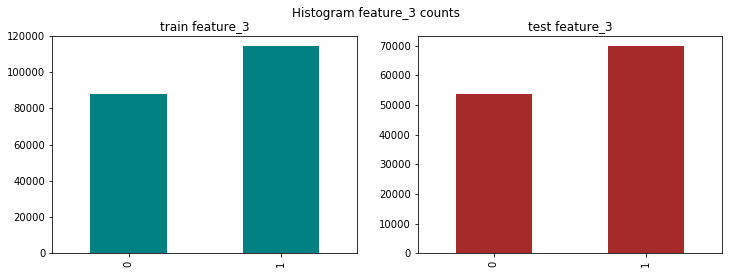

In [90]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4));
df_train['feature_3'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='train feature_3');
df_test['feature_3'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='test feature_3');
plt.suptitle('Histogram feature_3 counts');
plt.show()

- These two plots show an important idea: while different categories of these features could have various counts, the distribution of target is almost the same. This could mean, that these features aren't really good at predicting target - we'll need other features and feature engineering. Also it is worth noticing that mean target values of each catogory of these features is near zero. This could mean that data was sampled from normal distribution.
    

In [109]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

d1 = df_train['first_active_month'].value_counts().sort_index()
d2 = df_test['first_active_month'].value_counts().sort_index()
data = [go.Scatter(x=d1.index, y=d1.values, name='train'), go.Scatter(x=d2.index, y=d2.values, name='test')]
layout = go.Layout(dict(title = "Counts of first active",
                  xaxis = dict(title = 'Month'),
                  yaxis = dict(title = 'Count'),
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

Observations:

- Trends of counts for train and test data are similar, and this is great. Why there is such a sharp decline at the end of the period? I think it was on purpose. Or maybe new cards are taken into account only after fulfilling some conditions.

- TODO Also there is one line with a missing data in test. I'll fill in with the first data, having the same values of features.
 use this: test.loc[test['first_active_month'].isna(), 'first_active_month'] = test.loc[(test['feature_1'] == 5) & (test['feature_2'] == 2) & (test['feature_3'] == 1), 'first_active_month'].min()

##### Historical Transactions
Up to 3 months' worth of historical transactions for each card_id

In [36]:
e = pd.read_excel('./input/Data_Dictionary.xlsx', sheetname='history')
e

,historical_transactions.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,card_id,Card identifier
3,month_lag,month lag to reference date
4,purchase_date,Purchase date
5,authorized_flag,"Y' if approved, 'N' if denied"
6,category_3,anonymized category
7,installments,number of installments of purchase
8,category_1,anonymized category
9,merchant_category_id,Merchant category identifier (anonymized )


In [34]:
#Loading historical transaction Data
import pandas as pd

df_historical_transactions = pd.read_csv('./input/historical_transactions.csv')
print(f'{df_historical_transactions.shape[0]} samples in data')
df_historical_transactions.head()


29112361 samples in data


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


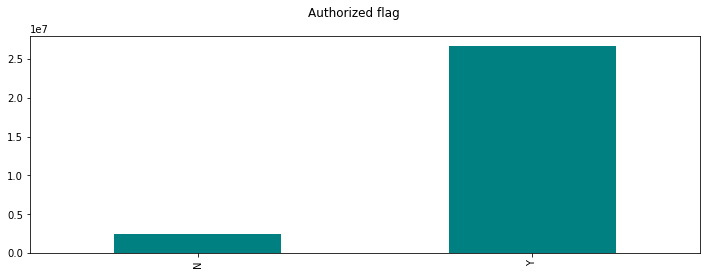

In [123]:
fig, ax = plt.subplots(1, 1, figsize = (12, 4));
df_historical_transactions['authorized_flag'].value_counts().sort_index().plot(kind='bar', ax=ax, color='teal', title='');
plt.suptitle('Authorized flag');
plt.show()

In [138]:
print(type(df_historical_transactions['authorized_flag']))
sum[x for x in df_historical_transactions['authorized_flag'].values if x == 'Y']

SyntaxError: invalid syntax (<ipython-input-138-2c34243c77d4>, line 2)

### Cleaning the data

In [114]:
Lets create some activity
def newfunc():
    pass

SyntaxError: invalid syntax (<ipython-input-114-15f3a0211bf0>, line 1)

### Feature engineering

### Define models and evaluate